In [1]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser
from platipy.imaging.registration.linear import linear_registration
from platipy.imaging.registration.utils import apply_transform

In [2]:
img_ct_lung_5 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_0_CT_NON_CONTRAST_CHEST_5.nii.gz")
img_ct_lung_10 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_1_CT_NON_CONTRAST_CHEST_10.nii.gz")

In [3]:
img_ct, tfm = linear_registration(
    img_ct_lung_5,
    img_ct_lung_10,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)


<class 'matplotlib.figure.Figure'>


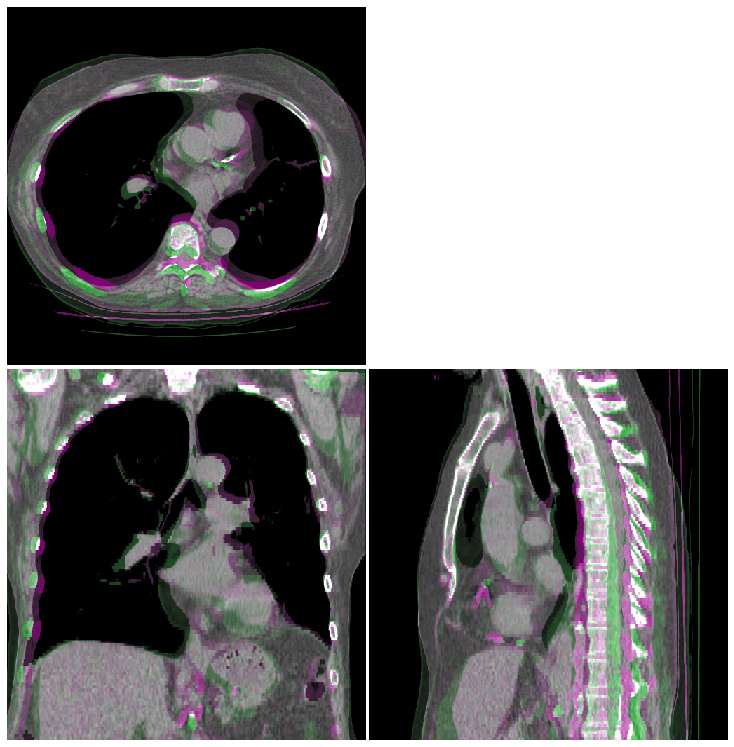

In [7]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_comparison_overlay(img_ct)
fig = vis.show()

In [22]:
ctr = sitk.ReadImage("./PRHGD5257_LUNG/STRUCTURES/PRHGD5257_LUNG_2_RTSTRUCT_4TH_RIB.nii.gz")

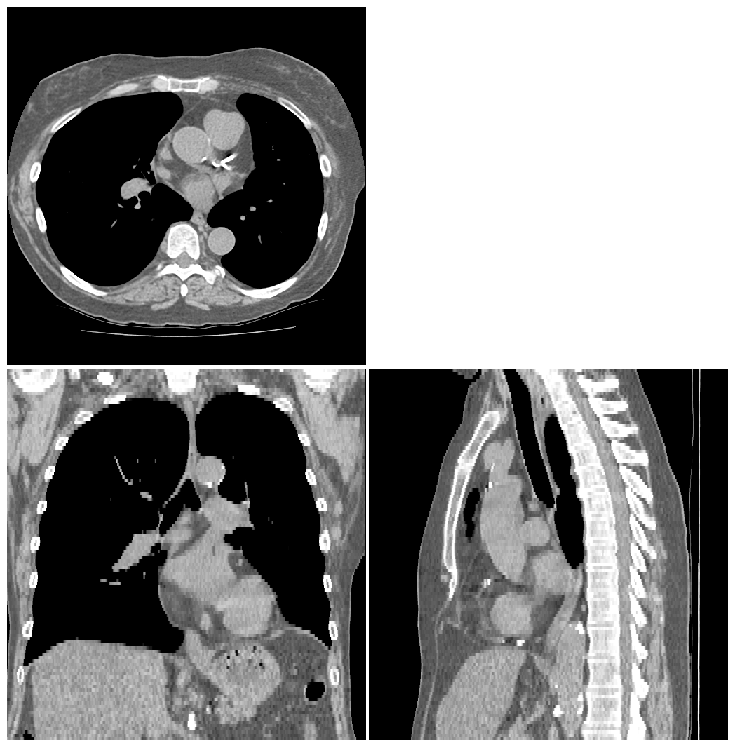

In [24]:
vis.add_contour(ctr, color="green", linewidth=3)
fig = vis.show()